In [54]:
import pandas as pd

In [55]:
df=pd.read_csv('50_Startups.csv')

In [56]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
df.shape

(50, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [59]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [60]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [61]:
df=df.drop(['State'], axis=1)

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

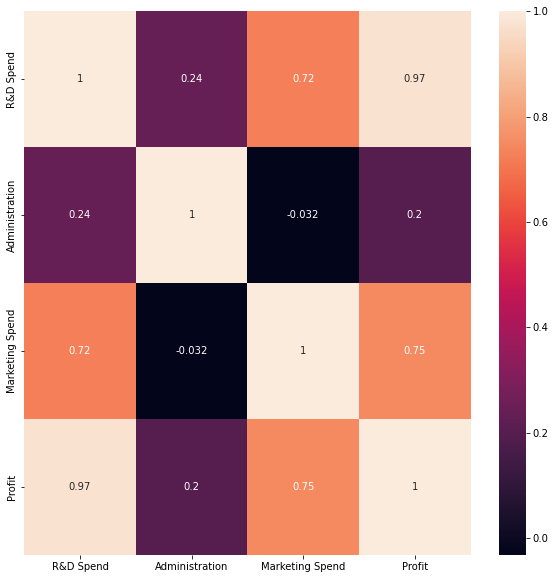

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


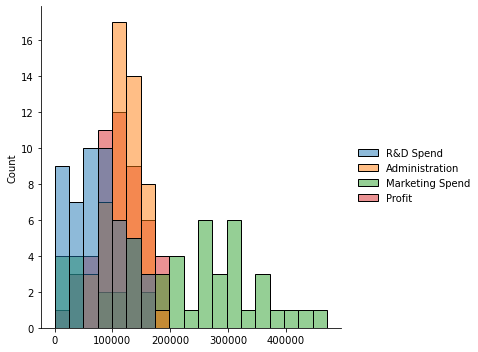

In [64]:
sns.displot(df,color='r',);

<AxesSubplot:>

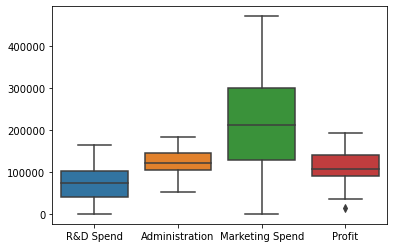

In [65]:
sns.boxplot(data=df,width=0.8)

## Handel Categorical Value

In [66]:
#from sklearn.preprocessing import LabelEncoder

In [67]:
#le=LabelEncoder()
le

LabelEncoder()

In [68]:
#df.State=le.fit_transform(df.State)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


## Dependent and Independent Variable

In [70]:
X = df.drop('Profit',axis=1)
y= df['Profit']
print(X.shape)
print(y.shape)

(50, 3)
(50,)


## Data Standerization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler= StandardScaler()
scaler

StandardScaler()

In [73]:
scaled=scaler.fit_transform(X)

## Train Test

In [74]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train,y_test= train_test_split(scaled,y, test_size=0.2, random_state=0)

## Model Selecton

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr=LinearRegression()
lr

LinearRegression()

In [106]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
lr.intercept_
lr.coef_
print('Intercept',lr.intercept_)
print('Coefficent',lr.coef_)

Intercept 111297.71256204927
Coefficent [35391.2501208    815.21987542  4202.06618916]


## Prediction

In [108]:
y_pred_lr=lr.predict(X_test)
X_pred_lr=lr.predict(X_train)

In [109]:
print('Prediction for test set:{}'.format(y_pred_lr))

Prediction for test set:[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


## Performance Measure

In [110]:
from sklearn.metrics import r2_score

In [89]:
a=r2_score(y_test,y_train_pred)
a

0.9393955917820571

In [91]:
b=r2_score(y_train,y_test_pred)
b

0.9499572530324031

In [112]:
import numpy as np
from sklearn import metrics